# Problem 1 MNIST Classification:
Training a fully connected Neural Network of 5 hidden layers of 1024 units each to Classify the MNIST images. I've used PyTorch for implementing this network 

In [0]:
import pandas as pd
import numpy as np
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [0]:
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F

In [3]:
### Mounting Google Drive for storing Input dataset ###
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Questions 1.1 and 1.2

In [0]:
### Downloading the dataset from the commands mentioned in the assignment ###
train_loader = torch.utils.data.DataLoader(datasets.MNIST("/content/gdrive/My Drive/MNIST Data",train=True, download=True,
               transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
               batch_size=50, shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.MNIST("/content/gdrive/My Drive/MNIST Data", train=False, download=True,
              transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
              batch_size=50, shuffle=True)

Displaying a few Images to see what the data looks like 

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

torch.Size([50, 1, 28, 28])


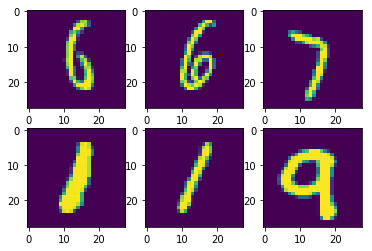

In [6]:
batch_id, (plot_data,target) = next(enumerate(train_loader))
print (plot_data.shape)
for i in range(0,6):
  plt.subplot(2,3,i+1)
  plt.imshow(plot_data[i][0])

After looking at the data we can confirm that the images have fixed size of 28 x 28


## Defining the Network
I've defined a network of 1 input layer - 5 hidden layers - 1 output layer in this section. I tried using Xavier initialization for each layer but the results were more or less similar to the one without initialization. I am using ReLU as the activation function for all the layers except the last one. The last layer has Softmax as the activation function since we need probabilities for each of the 10 output units.

In [0]:
class Network(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Network, self).__init__()
    self.linear1 = torch.nn.Linear(D_in,H)
    self.linear2 = torch.nn.Linear(H,H)
    # torch.nn.init.xavier_uniform_(self.linear2.weight)
    self.linear3 = torch.nn.Linear(H,H)
    # torch.nn.init.xavier_uniform_(self.linear3.weight)
    self.linear4 = torch.nn.Linear(H,H)
    # torch.nn.init.xavier_uniform_(self.linear4.weight)
    self.linear5 = torch.nn.Linear(H,H)
    # torch.nn.init.xavier_uniform_(self.linear5.weight)
    self.linear6 = torch.nn.Linear(H,H)
    # torch.nn.init.xavier_uniform_(self.linear6.weight)
    self.linear7 = torch.nn.Linear(H,D_out)

  def forward(self, x):
    output1 = F.relu(self.linear1(x))
    output2 = F.relu(self.linear2(output1))
    output3 = F.relu(self.linear3(output2))
    output4 = F.relu(self.linear4(output3))
    output5 = F.relu(self.linear5(output4))
    output6 = F.relu(self.linear6(output5))
    output = F.log_softmax(self.linear7(output6), dim = 1)
    output_list = []
    output_list = [output1,output2,output3,output4,output5,output6,output]
    return output_list

The parameters mean the following: \\
D_in = input dimension \\
D_out = output dimension \\
H = hidden dimension \\
N = batch size

In [0]:
N, D_in, D_out, H = 50, 784, 10, 1024

Number of epochs are set to 30 \\
The learning rate is set to be 0.0003 with Negative Log Loss as the loss function and Adam Optimizer. I initially tried with Stochastic Gradient Descent but Adam optimizer gave better results

In [9]:
epochs = 30
learning_rate = 0.0003
model = Network(D_in, H, D_out).to(device)
lossFunction = torch.nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print (model)

Network(
  (linear1): Linear(in_features=784, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (linear4): Linear(in_features=1024, out_features=1024, bias=True)
  (linear5): Linear(in_features=1024, out_features=1024, bias=True)
  (linear6): Linear(in_features=1024, out_features=1024, bias=True)
  (linear7): Linear(in_features=1024, out_features=10, bias=True)
)


### Training the Network with 30 epochs on the train dataset

In [10]:
for epoch in range(0,epochs):
  for i, (images,labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    _,_,_,_,_,_,y_pred = model(images)
    loss = lossFunction(y_pred, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 100 == 99:
        print('Epoch: ',epoch,'Batch: ',i,'Loss: ',loss.item())

Epoch:  0 Batch:  99 Loss:  0.5360778570175171
Epoch:  0 Batch:  199 Loss:  0.2506023347377777
Epoch:  0 Batch:  299 Loss:  0.21200938522815704
Epoch:  0 Batch:  399 Loss:  0.33387431502342224
Epoch:  0 Batch:  499 Loss:  0.17478474974632263
Epoch:  0 Batch:  599 Loss:  0.0307262372225523
Epoch:  0 Batch:  699 Loss:  0.24659472703933716
Epoch:  0 Batch:  799 Loss:  0.2278537005186081
Epoch:  0 Batch:  899 Loss:  0.057094648480415344
Epoch:  0 Batch:  999 Loss:  0.1027272641658783
Epoch:  0 Batch:  1099 Loss:  0.23671966791152954
Epoch:  0 Batch:  1199 Loss:  0.03699646517634392
Epoch:  1 Batch:  99 Loss:  0.1456364095211029
Epoch:  1 Batch:  199 Loss:  0.07930456846952438
Epoch:  1 Batch:  299 Loss:  0.1886737197637558
Epoch:  1 Batch:  399 Loss:  0.2058616280555725
Epoch:  1 Batch:  499 Loss:  0.015187263488769531
Epoch:  1 Batch:  599 Loss:  0.10156800597906113
Epoch:  1 Batch:  699 Loss:  0.006640596315264702
Epoch:  1 Batch:  799 Loss:  0.12299104779958725
Epoch:  1 Batch:  899 Los

### Running the model on Test Dataset
After 30 epochs we get test accuracy of 98.11%

In [0]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        _,_,_,_,_,_, outputs = model(images)
        ### this returns index and max value as a tuple, predicted will have index ###
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [12]:
print ('The Test accuracy is ',correct/total * 100,'%')

The Test accuracy is  98.11 %


# Question 1.3
The 10 x 10 plot shows us that the Classification was near perfect and confirms the > 98% accuracy on test data. For each of the 1000 images in test dataset, the unit with maximum probability is selected and then plotted in the 10 x 10 matrix

In [0]:
import random

In [0]:
sample_loader = torch.utils.data.DataLoader(datasets.MNIST("/content/gdrive/My Drive", train=False, download=True,
              transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
              batch_size=1000, shuffle=True)

In [0]:
### Running the model again for 1000 samples ###
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in sample_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        output1,output2,output3,output4,output5,output6,outputs = model(images)
        ### this returns index and max value as a tuple, predicted will have index ###
        _, predicted = torch.max(outputs.data, 1)
        _, hidden_5 = torch.max(output6.data,1)

In [0]:
img_index = {}
for i in range(0,10):
  temp = []
  count = 0
  for j in range(0,1000):
    if ((predicted.cpu().numpy()[j] == i) and count < 11):
      temp.append(j)
      img_index[i] = temp
      count = count + 1

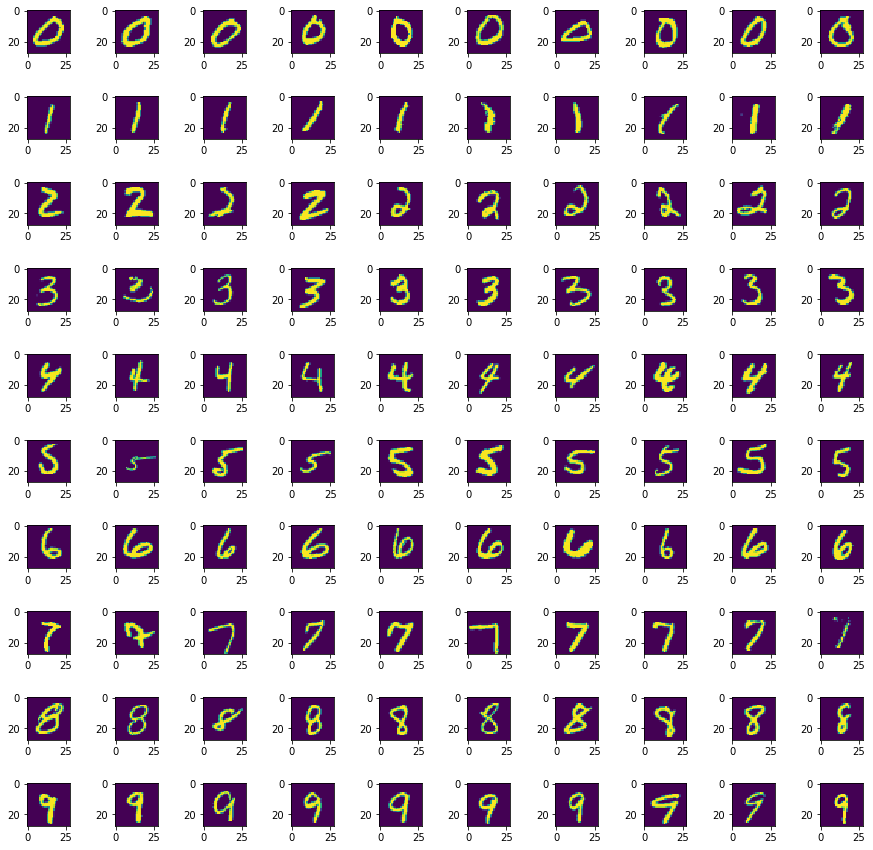

In [17]:
fig, axes = plt.subplots(10, 10,figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace=1)
for i in range(0,10):
  for j in range(0,10):
    axes[i,j].imshow(images[img_index[i][j]].view(28,28).cpu())

The network classifies all the plotted images correctly

# Question 1.4
A 10 x 10 plot of 10 random dimensions of second to last layer

In [0]:
random_num = random.sample(range(1024), 10)

In [0]:
dic = {}
for i in range(0,len(hidden_5)):
    if hidden_5[i].item() in dic:
        dic[hidden_5[i].item()].append(i)
    else:
        dic[hidden_5[i].item()] = [i]

### creating a dictionary of list of dimensions activated ###
for i in dic.keys():
  try:
    dic[i] = random.sample(dic[i], 10)
  except:
    continue

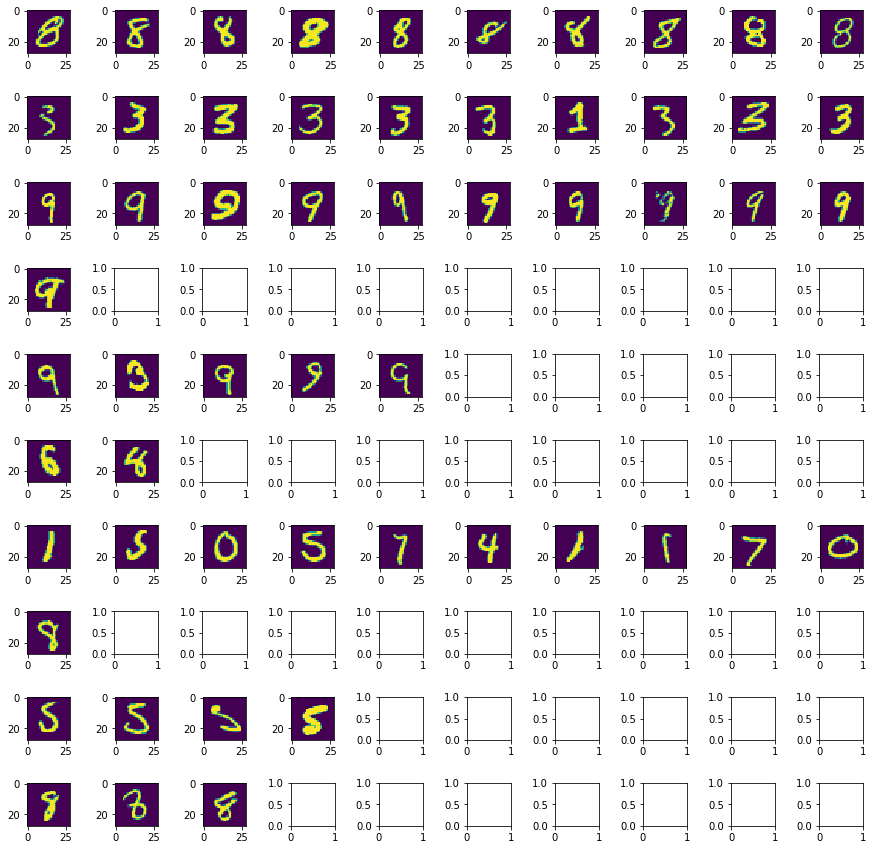

In [20]:
### Using try except to plot all the graphs without any warnings/errors ###
fig, axes = plt.subplots(10, 10,figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace=1)
i = -1
for key in random.sample(dic.keys(), 10):
  i=i+1
  try:
    for j in range(0,10):
      axes[i,j].imshow(images[dic[key][j]].view(28,28).cpu())
  except:
    continue

As compared to the output of Question 1.3 where all the 10 output units were plotted, in Question 1.4 we are only plotting 10 random dimensions out of 1024. The 1000 test images did not activate all the 1024 units of this hidden layer, which means some dimensions were not useful for classification (possibly shut off by ReLU activation). Some of these units might also have been activated for fewer than 10 images out of 1000 and hence we see some incomplete rows. Ideal case could be where all the classes are better separated so that we would not have subplot rows with mixed classes (e.g. Rows 5 and 7 of the plot)

# Question 1.5/1.6 - Implementing PCA/tSNE for MNIST Input dataset
I am using StandardScalar to transform the data so that it will have mean 0 and standard deviation of 1 \\



In [0]:
### Importing sklearn libraries for PCA and tSNE ###
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [0]:
test_images = images.cpu().numpy()
test_images = StandardScaler().fit_transform(test_images)

In [0]:
pca = PCA(n_components= 2)
principal_components = pca.fit_transform(test_images)

tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(test_images)

In [0]:
### Creating a dictionary with labels and corresponding indices ###
plot_dict = {}
for key in np.unique(labels.cpu().numpy()):
  label_list = []
  for i in range(0,1000):
    if labels[i].item() == key:
      label_list.append(i)
      plot_dict[key] = label_list

### Plot for PCA

<Figure size 432x288 with 0 Axes>

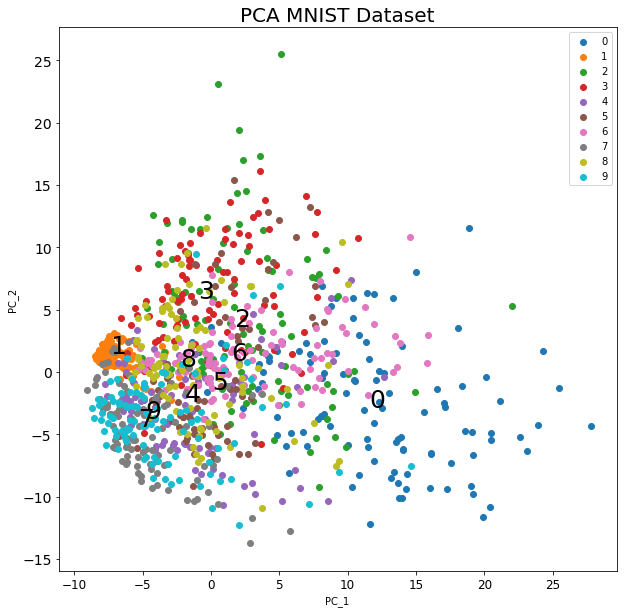

In [25]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title("PCA MNIST Dataset",fontsize=20)

### Plotting all labels with different colors ###
for label in np.unique(labels.cpu().numpy()):
  plt.scatter(principal_components[plot_dict[label],0], principal_components[plot_dict[label],1], cmap =plt.cm.get_cmap('summer', 10))
  x,y = (np.median(principal_components[plot_dict[label]], axis =0))
  plt.text(x,y,str(label),size=25)
plt.legend(np.unique(labels.cpu().numpy()))

### Plot for tSNE

<Figure size 432x288 with 0 Axes>

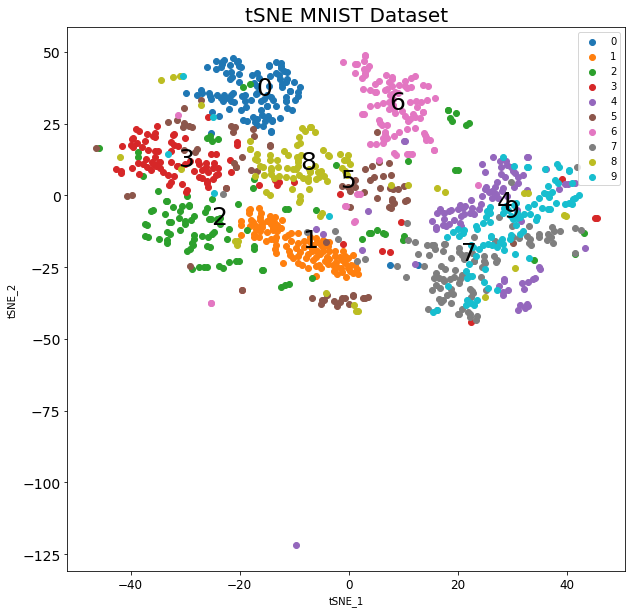

In [26]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.title("tSNE MNIST Dataset",fontsize=20)

### Plotting all labels with different colors ###
for label in np.unique(labels.cpu().numpy()):
  plt.scatter(tsne_components[plot_dict[label],0], tsne_components[plot_dict[label],1], cmap =plt.cm.get_cmap('summer', 10))
  x,y = (np.median(tsne_components[plot_dict[label]], axis =0))
  plt.text(x,y,str(label),size=25)
plt.legend(np.unique(labels.cpu().numpy()))

From the PCA output, we can see that all the 9 are not clearly separated from each other and hence are difficult to classify without any pre processing. \\
In tSNE the classes are better separated than PCA but there are some classes e.g. Class 4 and 9 which have a fair bit of overlap. Passing it through a fully connected layer would help us in classifying them accurately.

# Question 1.7 - Implementing PCA and tSNE the First Hidden Layer

In [0]:
### Creating re usable functions to plot all layers in Question 1.8 ### 
def plot_pca_hidden(hidden_layer,layer_number):
  test_images = hidden_layer.cpu().numpy()
  test_images = StandardScaler().fit_transform(test_images)

  pca = PCA(n_components= 2)
  principal_components = pca.fit_transform(test_images)

  ### Creating a dictionary with labels and corresponding indices ###
  plot_dict = {}
  for key in np.unique(labels.cpu().numpy()):
    label_list = []
    for i in range(0,1000):
      if labels[i].item() == key:
        label_list.append(i)
        plot_dict[key] = label_list

  plt.figure()
  plt.figure(figsize=(10,10))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('PC_1')
  plt.ylabel('PC_2')
  if layer_number == 'last':
    plt.title("PCA - Last layer",fontsize=20)
  else:
    plt.title("PCA - Hidden layer "+str(layer_number),fontsize=20)

  ### Plotting all labels with different colors ###
  for label in np.unique(labels.cpu().numpy()):
    plt.scatter(principal_components[plot_dict[label],0], principal_components[plot_dict[label],1], cmap =plt.cm.get_cmap('summer', 10))
    x,y = (np.median(principal_components[plot_dict[label]], axis =0))
    plt.text(x,y,str(label),size=25)    
  plt.legend(np.unique(labels.cpu().numpy()))

In [0]:
def plot_tsne_hidden(hidden_layer,layer_number):
  test_images = hidden_layer.cpu().numpy()
  test_images = StandardScaler().fit_transform(test_images)

  tsne = TSNE(n_components=2)
  tsne_components = tsne.fit_transform(test_images)

  ### Creating a dictionary with labels and corresponding indices ###
  plot_dict = {}
  for key in np.unique(labels.cpu().numpy()):
    label_list = []
    for i in range(0,len(hidden_layer)):
      if labels[i].item() == key:
        label_list.append(i)
        plot_dict[key] = label_list

  plt.figure()
  plt.figure(figsize=(10,10))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('tSNE_1')
  plt.ylabel('tSNE_2')
  if layer_number == 'last':
    plt.title("tSNE - Last layer",fontsize=20)
  else:
    plt.title("tSNE - Hidden layer "+str(layer_number),fontsize=20)

  ### Plotting all labels with different colors ###
  for label in np.unique(labels.cpu().numpy()):
    plt.scatter(tsne_components[plot_dict[label],0], tsne_components[plot_dict[label],1], cmap =plt.cm.get_cmap('summer', 10))
    x,y = (np.median(tsne_components[plot_dict[label]], axis =0))
    plt.text(x,y,str(label),size=25)    
  plt.legend(np.unique(labels.cpu().numpy()))

<Figure size 432x288 with 0 Axes>

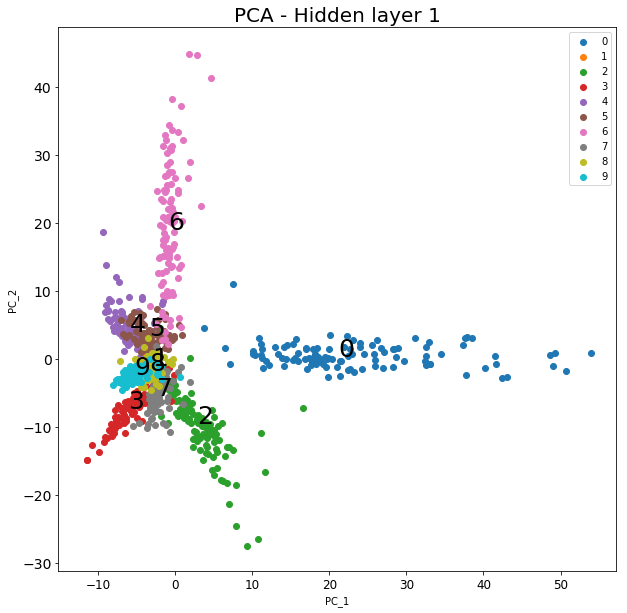

<Figure size 432x288 with 0 Axes>

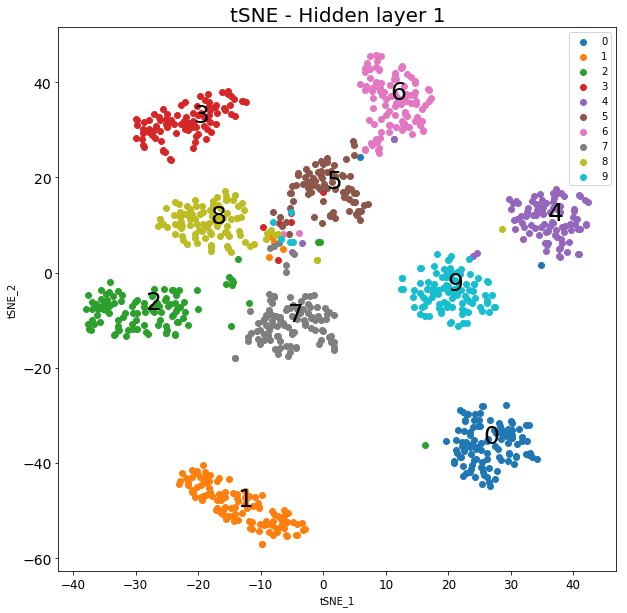

In [29]:
plot_pca_hidden(output2,1)
plot_tsne_hidden(output2,1)

Both PCA and tSNE plots have improved compared to the plots of the original dataset

# Question 1.8 - Implementing PCA and tSNE for remaining 4 Hidden layers and the Last layer
Using the functions in previous section, I've implemeted PCA and tSNE on all the remaining 4 Hidden layers and the output layer using a for loop.

<Figure size 432x288 with 0 Axes>

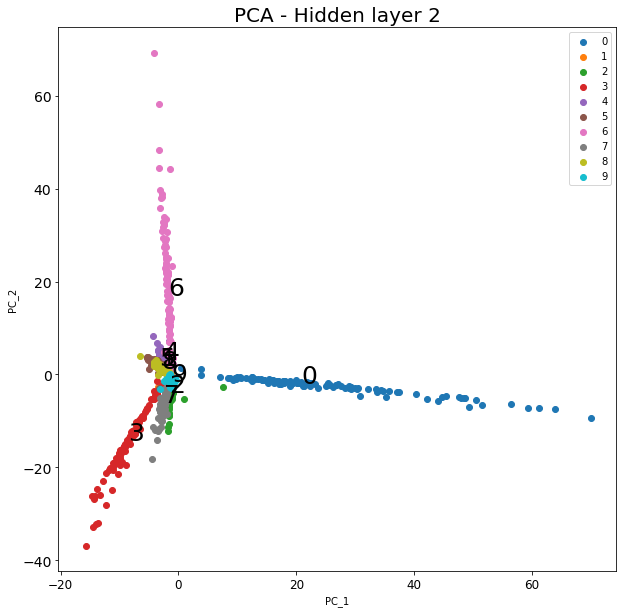

<Figure size 432x288 with 0 Axes>

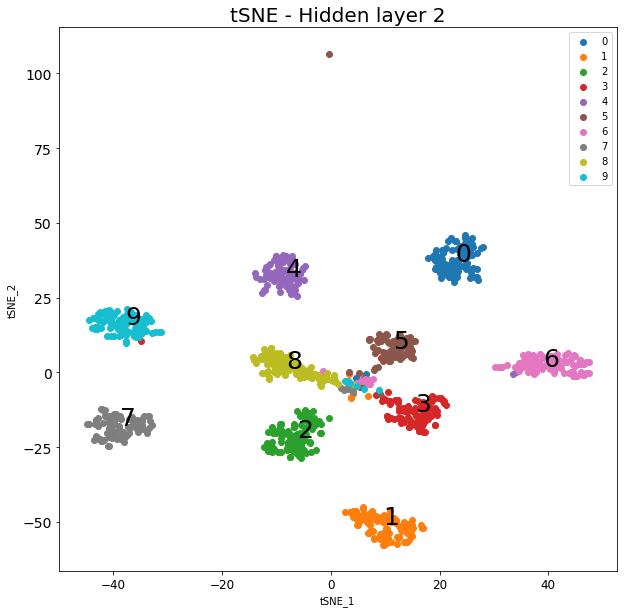

<Figure size 432x288 with 0 Axes>

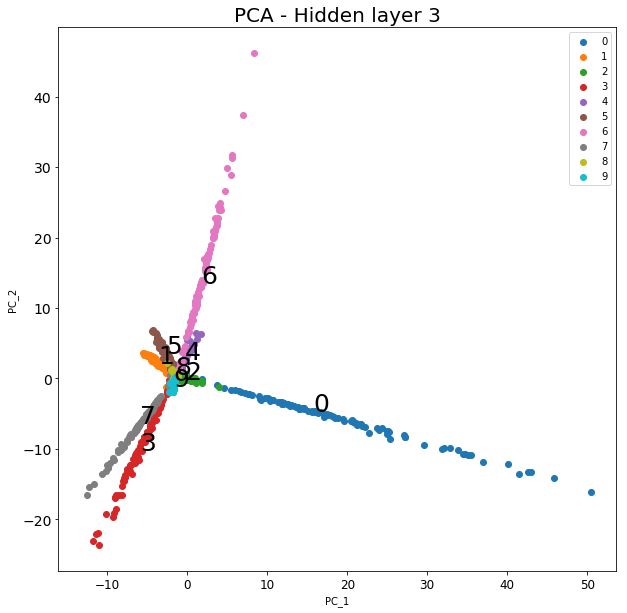

<Figure size 432x288 with 0 Axes>

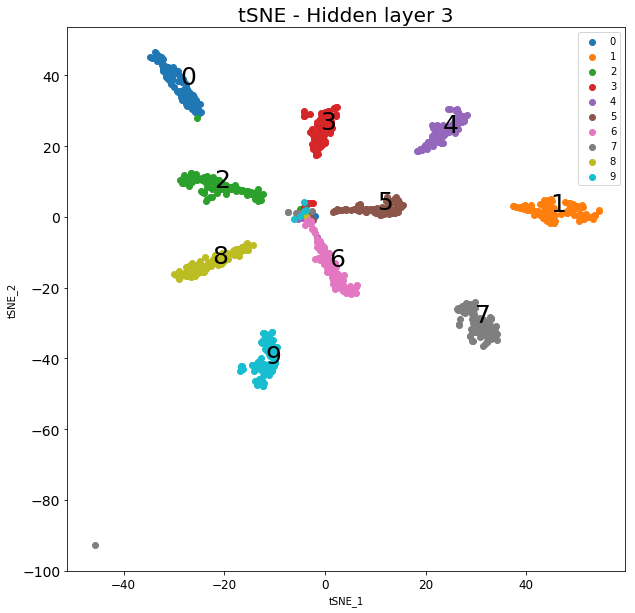

<Figure size 432x288 with 0 Axes>

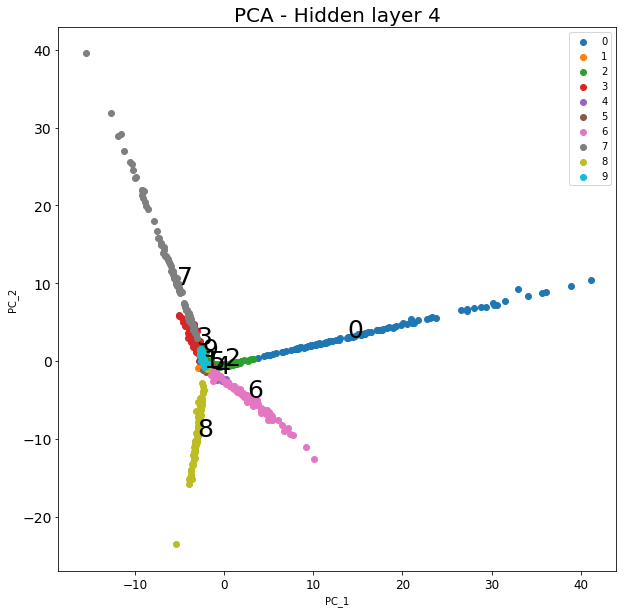

<Figure size 432x288 with 0 Axes>

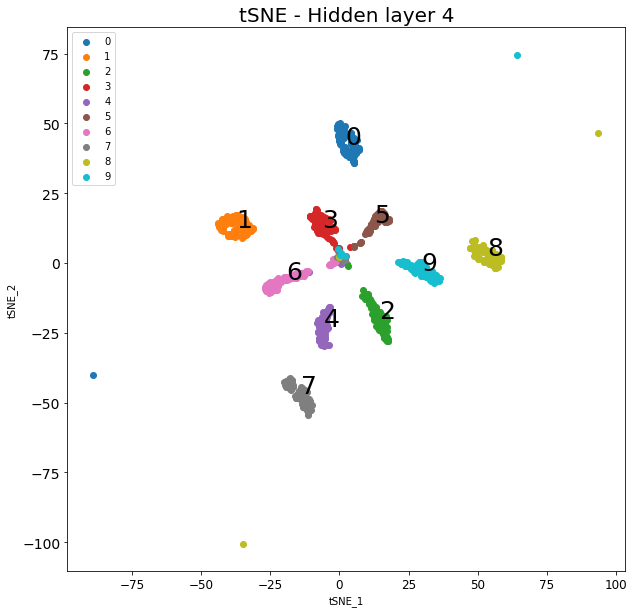

<Figure size 432x288 with 0 Axes>

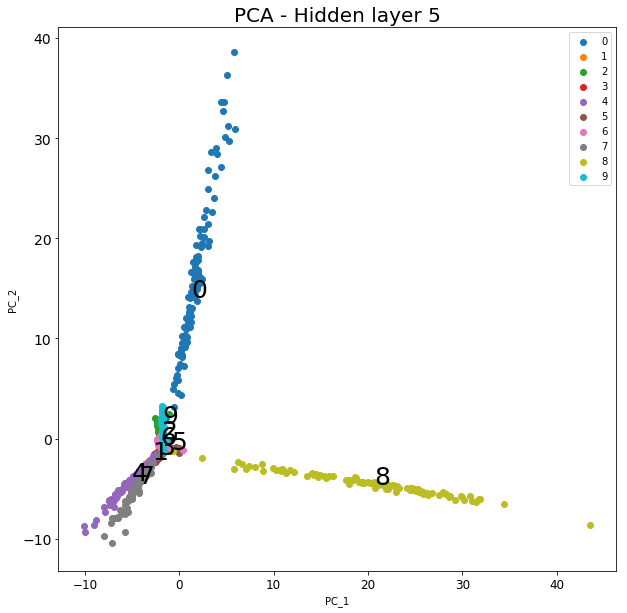

<Figure size 432x288 with 0 Axes>

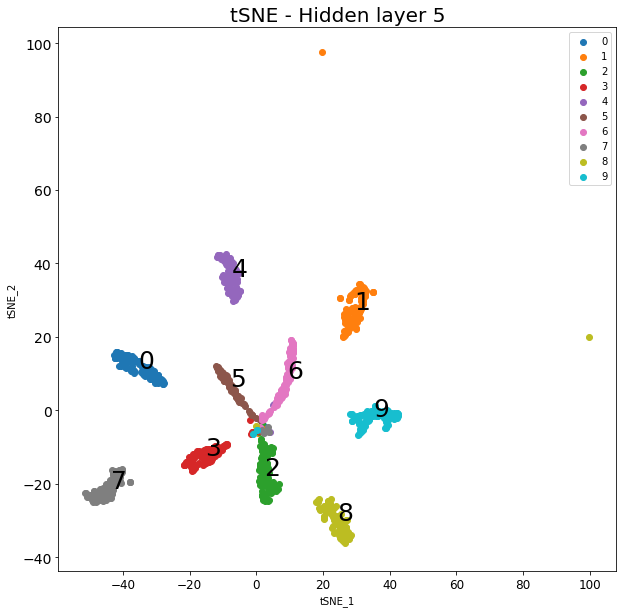

In [30]:
layers = [output3,output4,output5,output6]
n=1
for layer in layers:
  n = n+1
  plot_pca_hidden(layer,n)
  plot_tsne_hidden(layer,n)

Plotting PCA and tSNE for the output layer separately to avoid incorrect titles

<Figure size 432x288 with 0 Axes>

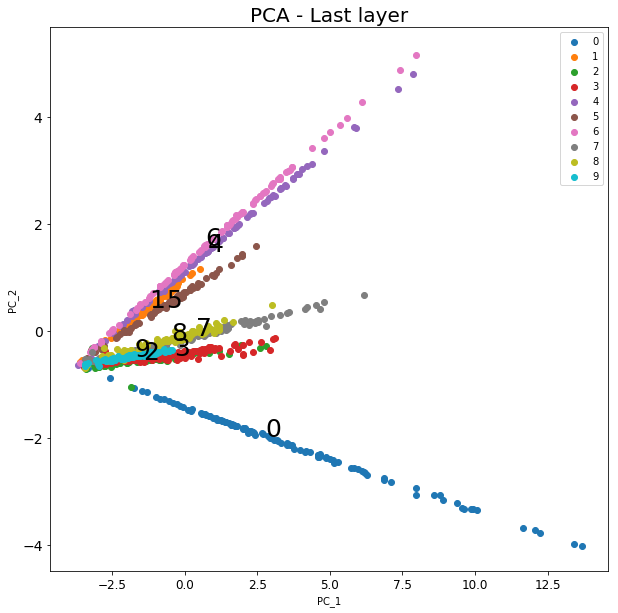

<Figure size 432x288 with 0 Axes>

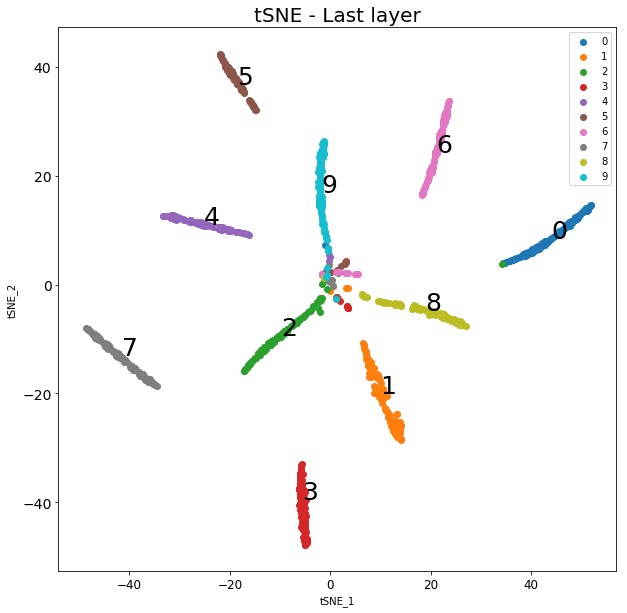

In [31]:
plot_pca_hidden(outputs,'last')
plot_tsne_hidden(outputs,'last')

As we plot PCA and tSNE graphs for all the layers, we observe that the separation between classes start increasing and the classification of the images becomes easier. tSNE has better separation compared to PCA which probably because the way both these algorithms work.

# References
I've used examples for reference from the following websites to complete the implementation of neural network and to plot the graphs
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html \\
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html \\
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html \\
https://pythonspot.com/matplotlib-scatterplot/